In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: C:\Users\ncmia\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
data = pd.read_csv("C:/Users/ncmia/OneDrive/Desktop/Depression_Student_Dataset_Unclean.csv")


In [4]:
categorical_columns = data.select_dtypes(include='object').columns

for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

print(data[categorical_columns].isnull().sum())

Gender                                   0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Family History of Mental Illness         0
Depression                               0
dtype: int64


C:\Users\ncmia\AppData\Local\Temp\ipykernel_16236\3518961469.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [5]:
numerical_columns = ['Age', 'Academic Pressure', 'Study Hours', 'Financial Stress']

mean_values = data[numerical_columns].mean()

data[numerical_columns] = data[numerical_columns].fillna(mean_values)
print(data.isnull().sum())

ID                                       0
Gender                                   0
Age                                      0
Academic Pressure                        0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


C:\Users\ncmia\AppData\Local\Temp\ipykernel_16236\1278714404.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Depression'] = data['Depression'].replace(['No'],0)


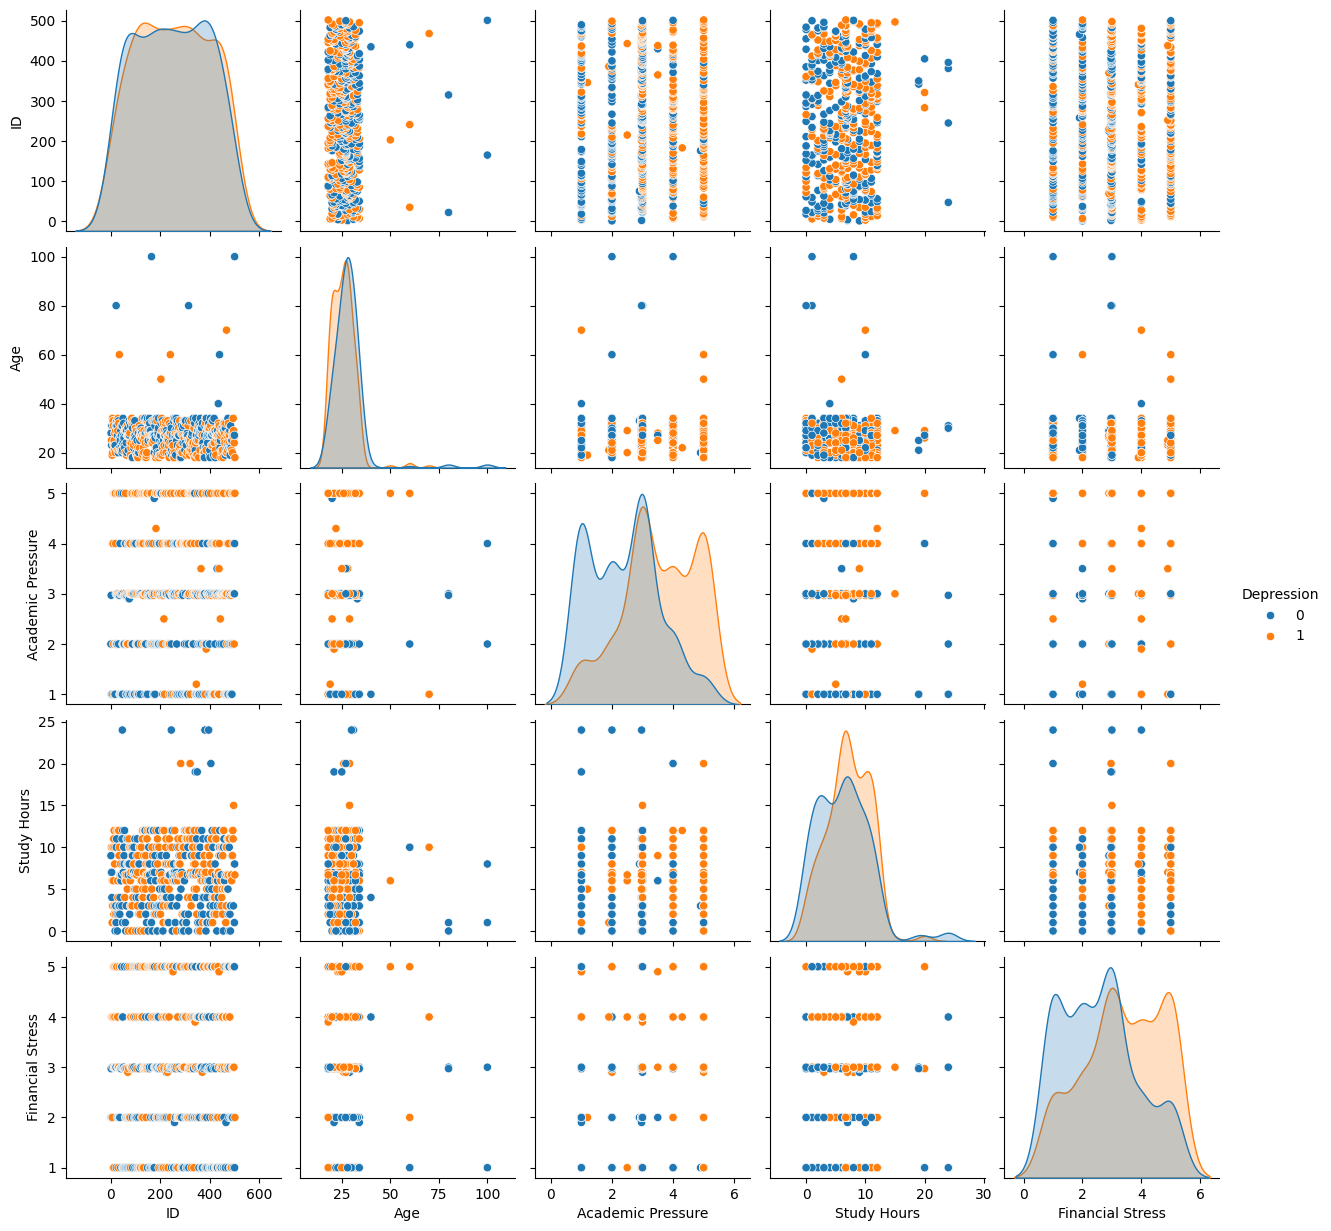

In [6]:
data['Depression'] = data['Depression'].replace(['Yes'],1)
data['Depression'] = data['Depression'].replace(['No'],0)
sns.pairplot(data=data,hue='Depression')

i converted the yes or no data into 1 and 0 respectively and represented a pair plot for the same

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

In [8]:
categorical_columns = ['Gender', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?']
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col].astype(str))

features = ['Age', 'Academic Pressure', 'Gender', 'Sleep Duration', 
            'Dietary Habits', 'Study Hours', 'Financial Stress', 
            'Have you ever had suicidal thoughts ?']


X = data[features]
y = data['Depression']


i divided the categorical data and the features of a target and divided the whole dataset as features as X and Depression as the target column as Y

In [9]:
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [10]:
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)

KNeighborsClassifier()

i have split the data here and fit the trained data in knn

In [11]:
knn.score(X_test,y_test)

0.8118811881188119

this is the accuracy score, it shows there is a 81% of accuracy in the data

In [12]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80        48
           1       0.83      0.81      0.82        53

    accuracy                           0.81       101
   macro avg       0.81      0.81      0.81       101
weighted avg       0.81      0.81      0.81       101

